# Introdução ao Pandas

## Importando dados e manipulando DataFrame e Series

In [3]:
# Importando o pandas
import pandas as pd

In [4]:
# Importando um arquivo csv
notas = pd.read_csv('./dados/ratings.csv')

In [5]:
# Exibir os 5 primeiros registro do dataset importado
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Formato da tabela(Array)
notas.shape

(100836, 4)

In [8]:
# Alterando o nome das colunas do DataFrame
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
# Exibindo a Series de nota
notas['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [14]:
# Listando somento os valores unicos da coluna nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [22]:
# O pandas utiliza a biblioteca numerica numpy, portanto o retorno do unique() é um ndarray numpy
type(notas['nota'].unique())

numpy.ndarray

In [16]:
# Contar a frequencia de cada nota e o retorno é ordenado do maior para o menor
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [41]:
# Media dos valores da coluna nota
print("Media", notas['nota'].mean(), sep=": ")
# Mediana dos valores da coluna nota
print("Mediana",notas['nota'].median(), sep=": ")

Media: 3.501556983616962
Mediana: 3.5


## Visualizando dados com histograma e boxplot

In [25]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


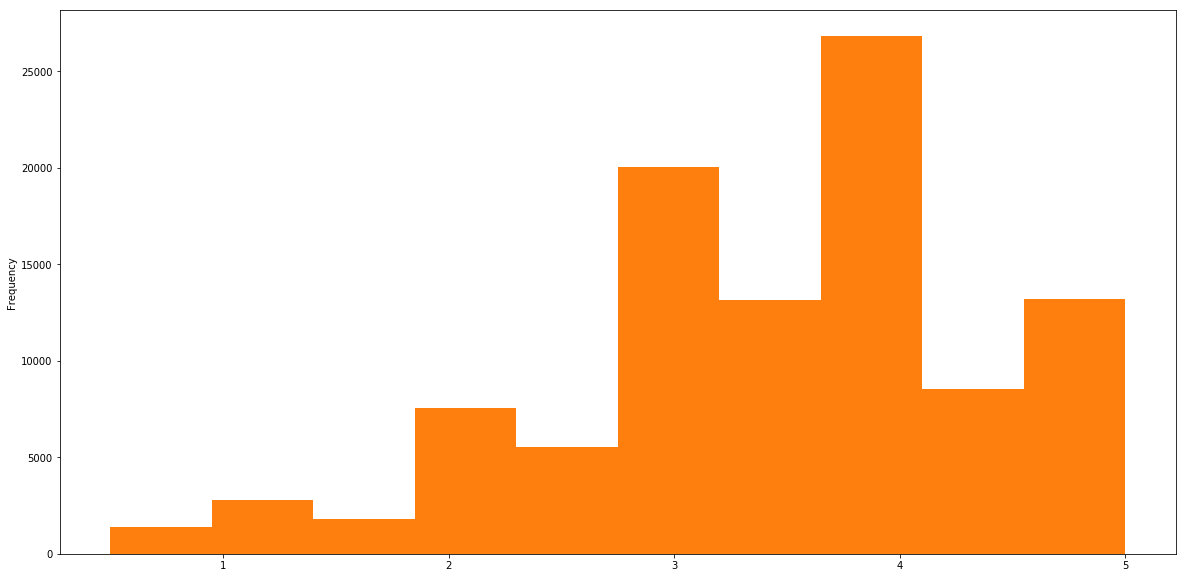

In [38]:
# PLOTANDO GRAFICOS COM O PANDAS 
# O pandas utiliza por baixo dos panos o matplotlib para plotar graficos

# Podemos plotar um grafico dessa meneira
notas.nota.plot.hist()
# Ou dessa maneira
notas.nota.plot(kind='hist')

# O Hist é um Histrograma, gráfico de frequência "quantidade que se repete uma unica nota"
# O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico 
# de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes
# (uniformes ou não uniformes).

In [42]:
# Descrever algumas estatisticas ideais para uso
# count: quantidade de registros
# mean: media
# std: desvio padrão
# min: Valor minino (Menor nota)
# 25%: 1 quartil. Significa que 25% ou 1/4 das notas é menor que 3
# 50%: 2 e 3 quartil. Significa que 50% ou 2/4 das notas é maior que 3 e menor que 4
# 75%: 4 quartil. Significa que 25% ou 1/4 das notas é maior que 4
# max: Valor Maximo (Nota maxima)
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

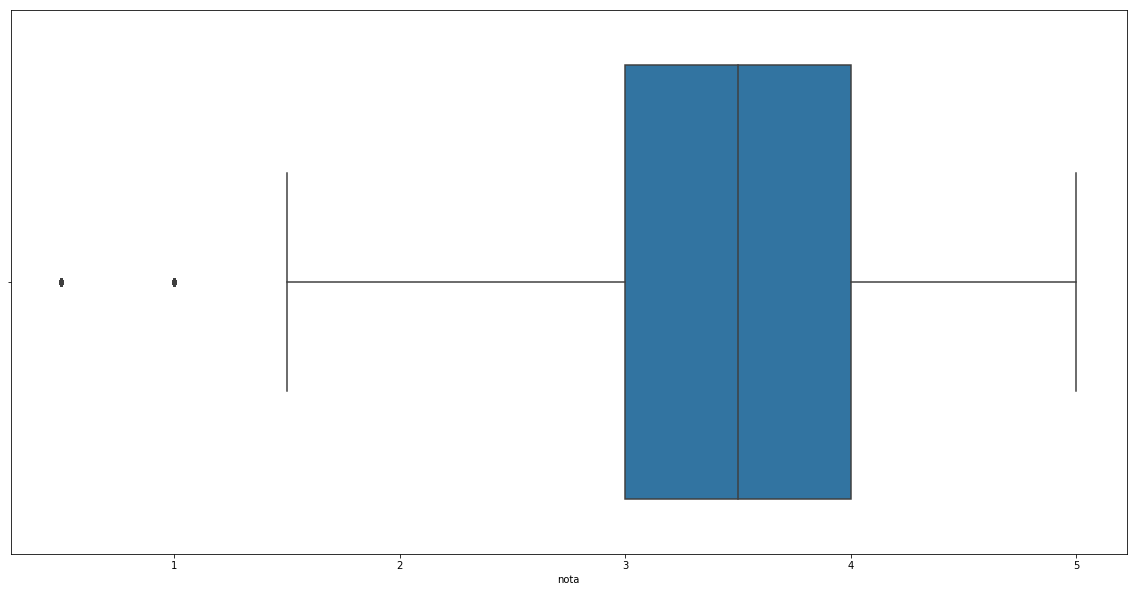

In [45]:
# Com o pandas usamos indiretamente o matplotlib para a visualização de dados, porem podemos usar outras libs e 
# uma muito famosa é a seaborn (sns)
# O seaborn tambem utiliza o matplotlib por baixo dos panos para plotar
import seaborn as sns

# Plotando um boxplot (grafico de caixa) para ver a dispersão de nossas notas
# Podemos notar no grafico, na caixa azul que 50% das notas é entre 3 e 4
sns.boxplot(notas.nota)

# Já o boxplot, também conhecido como "distribuição de frequências", é um método alternativo 
# para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

# Análise exploratória de dados e mais gráficos (Exploratory data analysis)

## Analisando as notas por titulos

In [48]:
# Carregando dados de filmes
filmes = pd.read_csv('./dados/movies.csv')
# Alterando o nome das colunas
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas espeficicas por filme

In [57]:
# O Pandas disponibiliza query para realizarmos consultas em nosso DataSet
notas.query('filmeId==1').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [58]:
# Podemos selecionar uma series, porque o retorno da query é um DataSet filtrado com somente os filmes de id 1
notas.query('filmeId==1').nota.head()

0       4.0
516     4.0
874     4.5
1434    2.5
1667    4.5
Name: nota, dtype: float64

In [62]:
# Podemos filtrar com ids dinâmicamente
filmeId = 1
notas.query(f'filmeId=={filmeId}').head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [63]:
# Filtrar os filmes por id 1, selecionar somente a Series note e executar a função mean para retornar a media 
# da series nota selecionada
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [65]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [68]:
# Tipo de retorno da função groupby. DataFrameGroupBy
type(notas.groupby('filmeId'))

pandas.core.groupby.generic.DataFrameGroupBy

In [73]:
# Podemos agrupar um DataFrame por uma Serie, ou seja, os valores unico da Series selecionada vai ser os grupos e
# os valores de cada coluna vai ser a media. Temos que ficar atento para não considerarmos a media de Ids, no caso
# de usuarioId. Portanto vamos selecionar somente o que importa que é a media das notas por filmeId. 
# Podemos notar que o DataFrame comum tem um index incremental, sem "nenhum significado" e o DataFrameGroupBy tem
# como index o id do agrupamento, ou seja da Series escolhida para agruparmos (filmeId)

notas.groupby('filmeId').mean().nota
# Ou
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

# Podemos comparar com o resultado da query(filmeId == 1) gerando a media da Series nota.

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

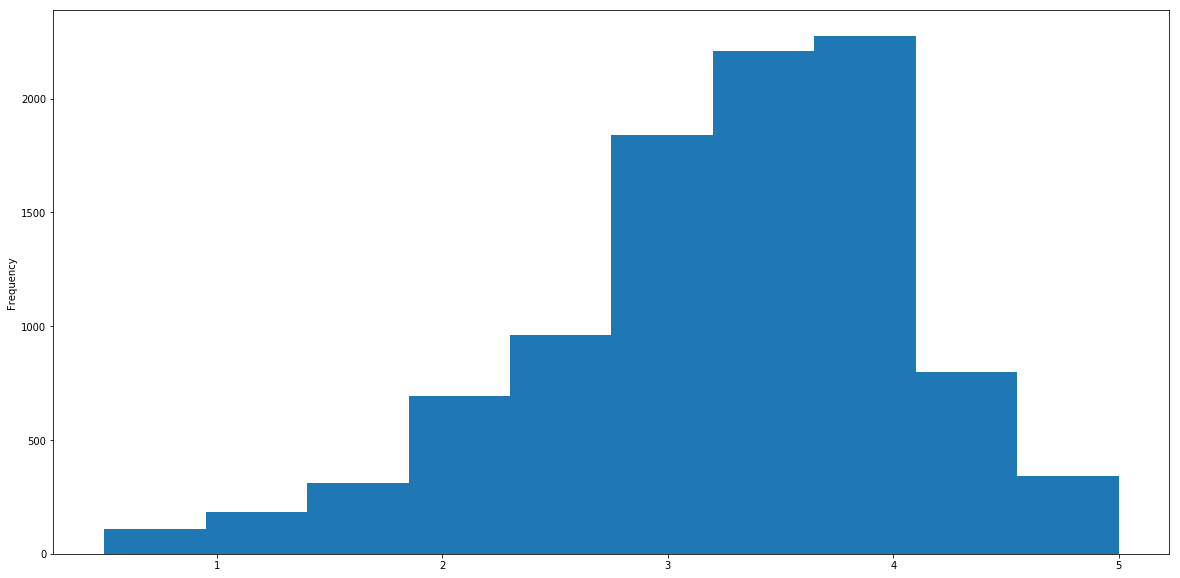

In [76]:
# Vamos plotar um histograma para analisar a frequencia de medias por filmes
medias_por_filme.plot.hist()

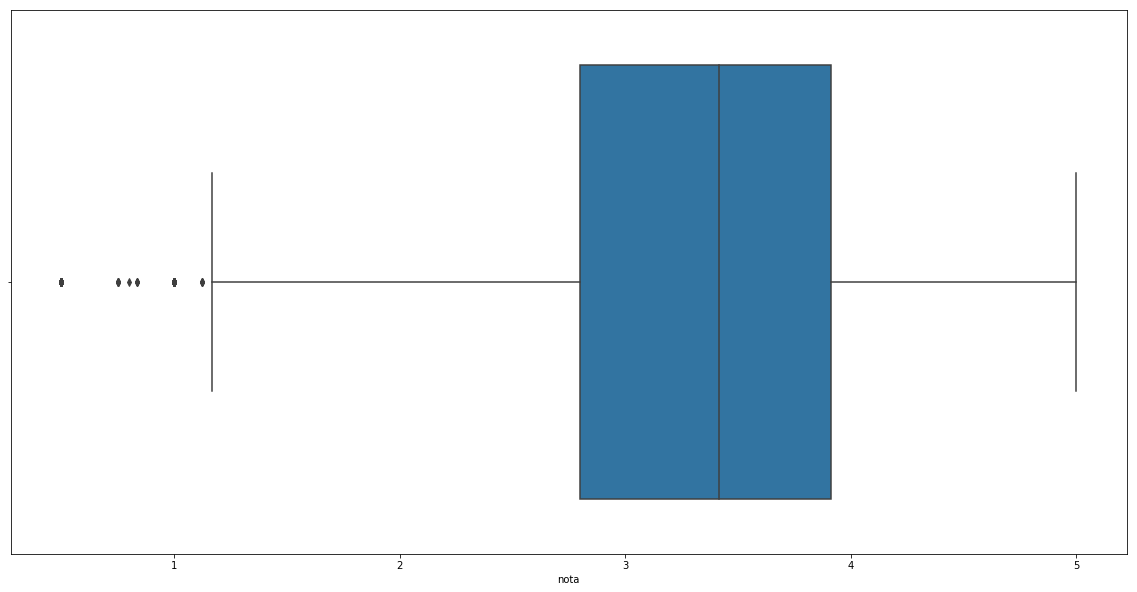

In [77]:
# Plotando boxplot com seaborn
# Analisando o boxplot, podemos concluir que a mediana das media esta entre a media 2.8 a 3.8 aproximadamente.
# Porem temos que resolver os outliers para melhorar a distribução das notas para melhorar as medias.
sns.boxplot(medias_por_filme)

In [78]:
# Podemos ver detalhadamente os resultados estatistico das medias por filmes
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

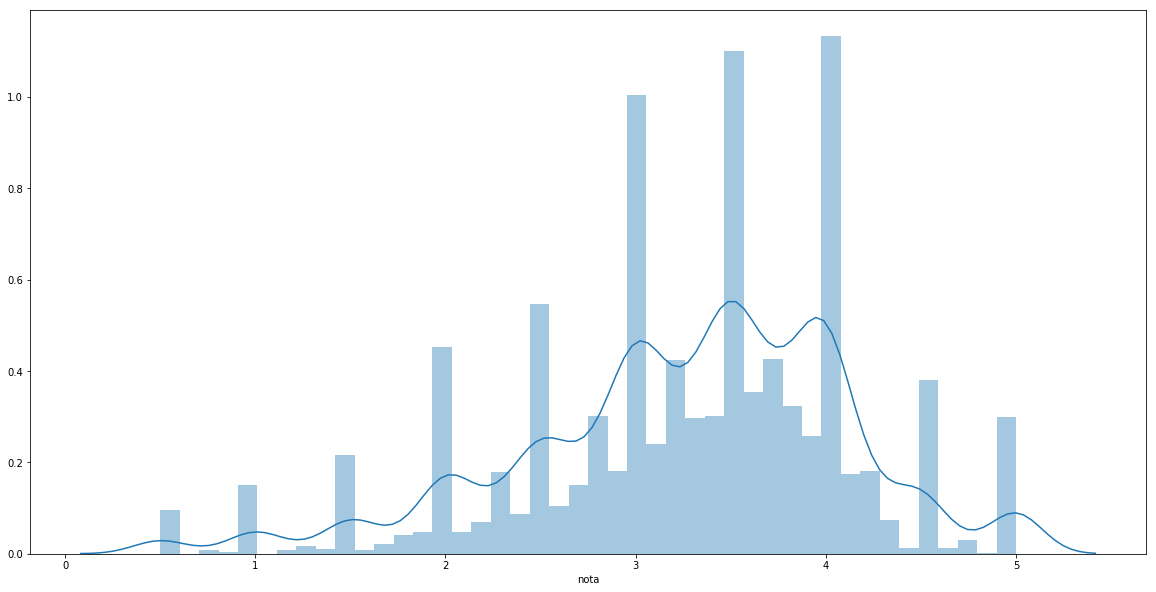

In [79]:
# Plotando histograma com seaborn
sns.distplot(medias_por_filme)

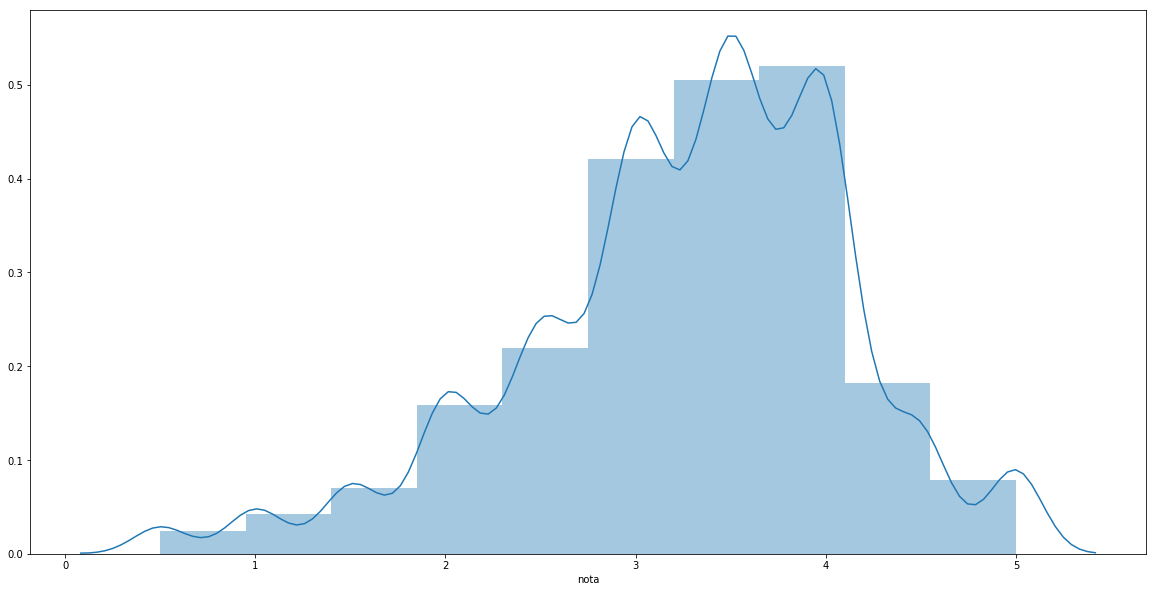

In [80]:
# Podemos analisar no grafico acima que contem muitas barras para representar a frequencia, podemos configurar
# bins = 10 -> Barras para representar a frequencias das medias por filmes no histrograma
sns.distplot(medias_por_filme, bins=10)

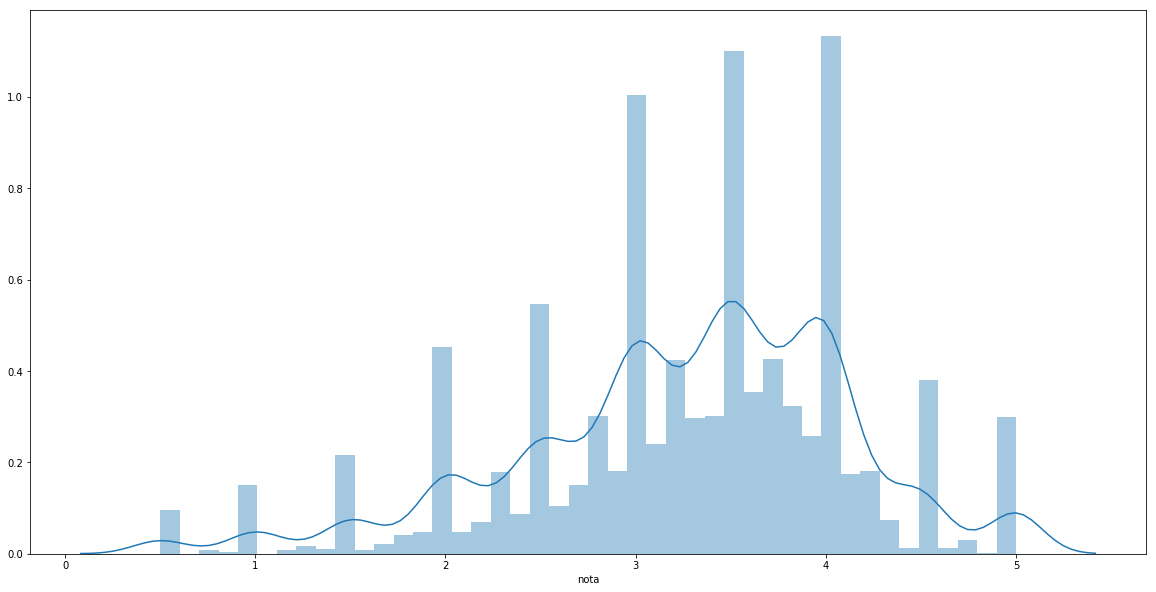

In [81]:
# Porem temos que tomar cuidado com a definição de barras porque podemos passar uma mensagem "errada" e o seaborn 
# tem por padrão algumas boas praticas para definir a quantidade de barras ideais para os nossos dados
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

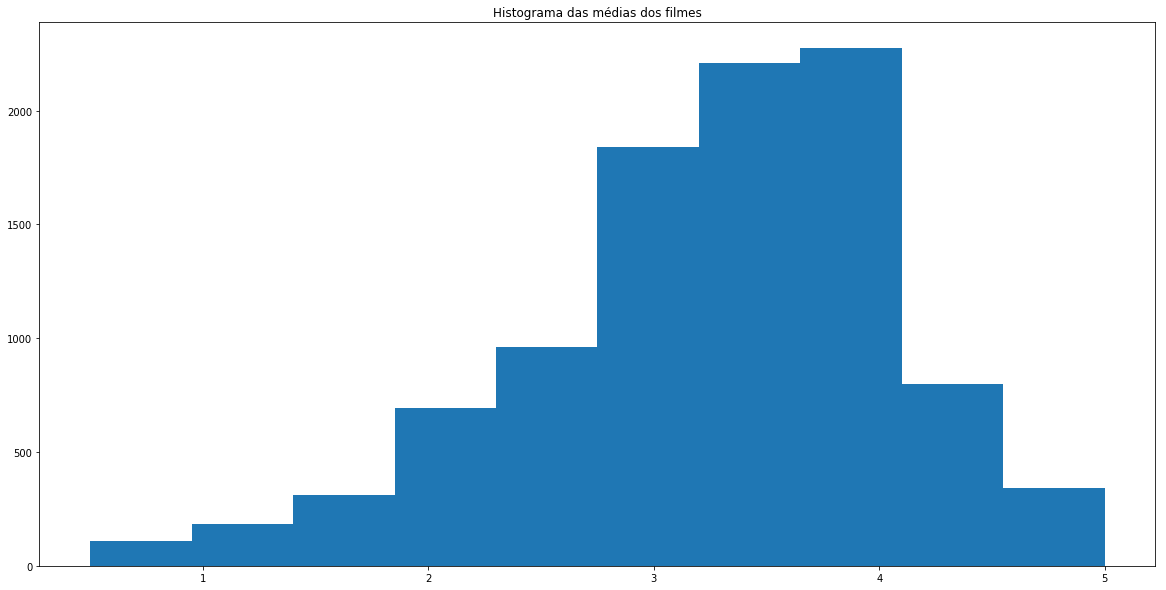

In [83]:
# O matplotlib pode ser considerada uma biblioteca de plotagem de baixo nivel que muitas outras utilizam
import matplotlib.pyplot as plt

# Exempo de plotando um histograma de medias por filmes
plt.hist(medias_por_filme)
# Adicionando um titulo ao grafico
plt.title('Histograma das médias dos filmes')

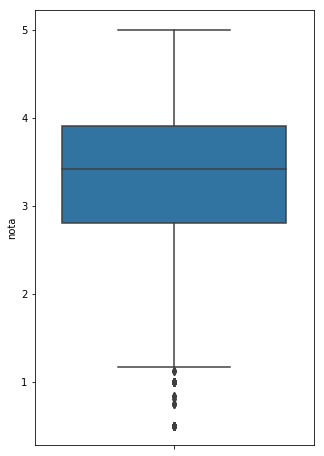

In [86]:
# O matplotlib pode ser considerada uma biblioteca de plotagem de baixo nivel que muitas outras utilizam
import matplotlib.pyplot as plt
# Como o seaborn utiliza o matplotlib, podemos importa-lo e configura-lo para o seaborn utilizar
# Por exemplo, vamos configurar o tamanho da figura de plotagem
plt.figure(figsize=(5,8))

# Por padrão o boxplot do seaborn esta na horizontal e é muito utilizado na vertical, para isso o seaborn
# fornece a opção de escolher
sns.boxplot(y=medias_por_filme)